<a href="https://colab.research.google.com/github/BeachArcade/FDSfE_EChan/blob/main/Class%20Demo/16_18_1_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using QGIS
* Multiple tools are often used together
  * multiple daya inputs are used to create a single output

## Tool consideration
* read the tool tips resource to understand how it works and if its appropriate
* accuracy of input data determines accuracy of resources

## Tools
* Buffer: creates a limit around an entity using a dynamic/fixed distance
  * eg. find out how accessible a place is through proximity
  * Will create a polygon around a feature at a given distance
    * Input can be a line or apolygon
      * There are also options to dissolves or create seperate features
    * eg. 50mi around mines, 5mi around rivers
* Clip
  * Use one layer's extent to clip down the features of one layer to another
* Vector analysis tools
  * analyze geometries
  * merge multiple vectors
  * use statistical functions on quantifiable data
* Raster analysis tools
  * Assign projections
  * Get slope
  * Merge multiple rasters together
  * Extraction
    * create a subset of data
  * Conversion
    * Polygonize: Raster -> Vector
    * Rasterize: Vector -> Raster
* Processing Plugin:
  * Powerful geospatial analysis framework to call native and 3rd party algorithms from QGIS, such as GDAL, GRASS, SAGA, R, etc.

## Surface Analysis
  * Create a continous surface from points
    * Continuous data eg:
      * Elevation
      * Temperatures
      * Poulation density
  * Discrete variable:
    * eg. Income
    * You cannot predict the value of it, independent of other attributes

## First Law of Geography
Things that are closer together are more likely to have similar data than those that are farther apart ~ *Tobler*


## Zonal Statistics as Tables
* Important in rasters
* Calculates one statistic from an input raster over a zone/area and produces a new layer
* Zonal Statistics as table (Pro)/Zonal Histogram (QGIS) Calculates multiple statistics and creates new layers

## Surface analysis tools are also used to
* Analyze patterns
* Analyze terrains
* Generalize
* Conduct hydrological anaysis
* Manage data
* Summarize data
* Use proximity

# Spatial Statistics
## What are Spatial Statistics
* Methods for analyzing spatial distributions, patterns, processes, and relationships


## Spatial Autocorrelations (Moran's I Statisical Technique)
* Measures the patterns of attribute values associated with features
* Compares the value of the feature to that of its neighbors
* Indicates clusters of high or low values (Positive $I$ values) or outliers (Negative $I$ Value)

## Neighbors:
* Distance Models
  * Inverse Distance
    * All features influence all other features but the closer something is the more influence it has
  * Distance band
    * Features outside a specified distance do not influence features within an area
  * Zone of indifference
    * Combines inverse distance and band distance
* Adjacency Models:
  * K Nearest Neighbors:
    * A specified number of neighboring features are included in calculations
  * Polygon Contiguity:
    * Polygons that share an edge or node influence each other
  * Spatial weights:
    * Specified by the user

## Other Spatial Tools
* Analyzing patterns
  * Nearest neighbor, Ripley's K
* Geographic Distrbutions
  * Mean, median, Directional mean
* Regression
  * Geographic, Ordinary Least Squares (OLS)

## Distance and Network Analysis
 * Routing
 * Service Areas
 * Closest Facility
 * OD Matrix


# Spatial Regression
## Objectives
* how to use regression analysis to predict value of a dependent variable based on an independent variable
* To understand the meaning of the regression coefficients b<sub>0</sub> and b<sub>1</sub>
* Evaluate the assumptions of regression analysis and know what to do if the assumptions are violated
* Asses the relationship of multiple regressions through a correlation matrix

## Correlation vs Regression
* Scatter Plot: shows relationship between 2 variables
* Correlation Analysis: Measures the strength of the association (Linear Relationship) between 2 variables
  * Correlation is only concerned with thestrength of relationship
  * No casual effect is implied with correlation
  * IOW: *Correlation quantifies the strength of the linear relationship between a pair of variables, whereas regression expresses the relationship in the form of an equation.* ~ NIH.gov

## Types of Realtionships
* Strong: Points are close together
* Weak: Points are not close together
* Linear: Can be expressed as a linear equation
* Polynomial: Cannot be expressed in a linear equation
  * eg: Quadratic, Logarithmic, Exponential
* No Relationship: There is no relation between data points
* Positive: Increase in independent leads to increase in dependent
* Negative: Increase in independent leads tp decrease in dependent

## Regression Analysis:
* Idea:
  * Predict the value of a dependent variable vased on the value of at least one independent variable
  * Explain the impact of an independent variable on the dependent variable
* Variables:
  * Dependent Variable: Variable we wish to predict or explain
    * Output
  * Independent Variable used to predict or explain dependent variable
    * Input

## Simple Linear Regression Model
* $ Y_{i} = \beta_{0} + \beta_{1}x_{i} + \epsilon_{i} $
  * $Y$ = predicted value
  * $b_{0}$ Estimate of regression intercept
  * $b_{1}$ estimated slope
  * $X_{i}$ value of $x$ for observation $i$
  * $\epsilon_{i}$ = Random Error for $X_{i}$ value

## Assumptions of Regression: L.I.N.E.
* Linearity
  * Relationship between $x$ and $y$ is linear
* Independence of Errors
  * Error values are statistically independent
  * Particularly important when data is collected over a period of time
* Normality of Error
  * Error values are normally distributed for any given value of $x$
* Equivalence Variance (Homoscedasticity)
  * Probability of distribution of the errors has constant variance


# Pratical Session
---
## Influence of Spatial Distribution of trees on local heat vunerability in Philly and relationship on chronic diseases

In [3]:
# Install packages to colab environment
!sudo apt-get update && apt-get install -y libspatialindex-dev
!pip install rtree
!pip install geopandas

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libspatialindex-dev is already the newest version (1.9.3-2).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [5]:
# More imports
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import scipy as stats

In [4]:
# Connect and mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Call files from drive
ct_tree = pd.read_csv('/content/drive/MyDrive/24W GEOG271 Course/Data/Philly data/Heat_Trees_project/ct_trees.csv')
heat = pd.read_csv('/content/drive/MyDrive/24W GEOG271 Course/Data/Philly data/Heat_Trees_project/heat.csv')
heat.head()

,Unnamed: 0,GEOID10,HVI_SCORE,geometry,num_trees,ave_dbh
0,0,42101019000,0.935255,"POLYGON ((-75.0949037530549 40.0104860796399, ...",192,14.661458
1,1,42101019100,2.963969,"POLYGON ((-75.1071537566382 40.0167360797785, ...",430,19.905750
2,2,42101019200,2.676547,"POLYGON ((-75.1075956511127 39.9996716549479, ...",320,10.568750
3,3,42101019700,3.156173,"POLYGON ((-75.1358598309214 40.0119913037377, ...",195,14.174359
4,4,42101019800,2.885302,"POLYGON ((-75.1367161109815 40.0080297688381, ...",188,14.486631


In [9]:
# Disp 5 rows
ct_tree.head()

,geoid,num_trees,ave_dbh
0,NaN,6983,13.715065
1,4.210100e+10,1060,9.975472
2,4.210100e+10,252,9.106000
3,4.210100e+10,1086,8.928177
4,4.210100e+10,253,6.106719


In [11]:
# get shapefile
heat_shape = gpd.read_file('/content/drive/MyDrive/24W GEOG271 Course/Data/Philly data/Heat_Trees_project/heat.shp')

In [13]:
# Alternative to get shapefile
heat_shape = gpd.GeoDataFrame.from_file('/content/drive/MyDrive/24W GEOG271 Course/Data/Philly data/Heat_Trees_project/heat.shp')

In [14]:
heat_shape

,GEOID10,HVI_SCORE,num_trees,ave_dbh,geometry
0,42101019000,0.935255,192,14.661458,"POLYGON ((-75.09490 40.01049, -75.09497 40.010..."
1,42101019100,2.963969,430,19.905750,"POLYGON ((-75.10715 40.01674, -75.10706 40.016..."
2,42101019200,2.676547,320,10.568750,"POLYGON ((-75.10760 39.99967, -75.10815 39.999..."
3,42101019700,3.156173,195,14.174359,"POLYGON ((-75.13586 40.01199, -75.13654 40.012..."
4,42101019800,2.885302,188,14.486631,"POLYGON ((-75.13672 40.00803, -75.13686 40.007..."
...,...,...,...,...,...
369,42101036203,-1.626316,291,13.536082,"POLYGON ((-74.96488 40.07728, -74.96480 40.077..."
370,42101035302,-0.934188,168,1.476190,"POLYGON ((-74.98757 40.07583, -74.98738 40.075..."
371,42101036201,-1.094011,161,15.776398,"POLYGON ((-74.98499 40.07453, -74.98542 40.074..."
372,42101036302,-1.194634,76,17.210526,"POLYGON ((-74.97990 40.09382, -74.97995 40.093..."


In [15]:
heat_shape['canopy'] = heat_shape['ave_dbh'] * heat_shape['num_trees']
heat_shape.head()

,GEOID10,HVI_SCORE,num_trees,ave_dbh,geometry,canopy
0,42101019000,0.935255,192,14.661458,"POLYGON ((-75.09490 40.01049, -75.09497 40.010...",2815.000000
1,42101019100,2.963969,430,19.905750,"POLYGON ((-75.10715 40.01674, -75.10706 40.016...",8559.472589
2,42101019200,2.676547,320,10.568750,"POLYGON ((-75.10760 39.99967, -75.10815 39.999...",3382.000000
3,42101019700,3.156173,195,14.174359,"POLYGON ((-75.13586 40.01199, -75.13654 40.012...",2764.000000
4,42101019800,2.885302,188,14.486631,"POLYGON ((-75.13672 40.00803, -75.13686 40.007...",2723.486631


Text(0.5, 1.0, 'Canopy')

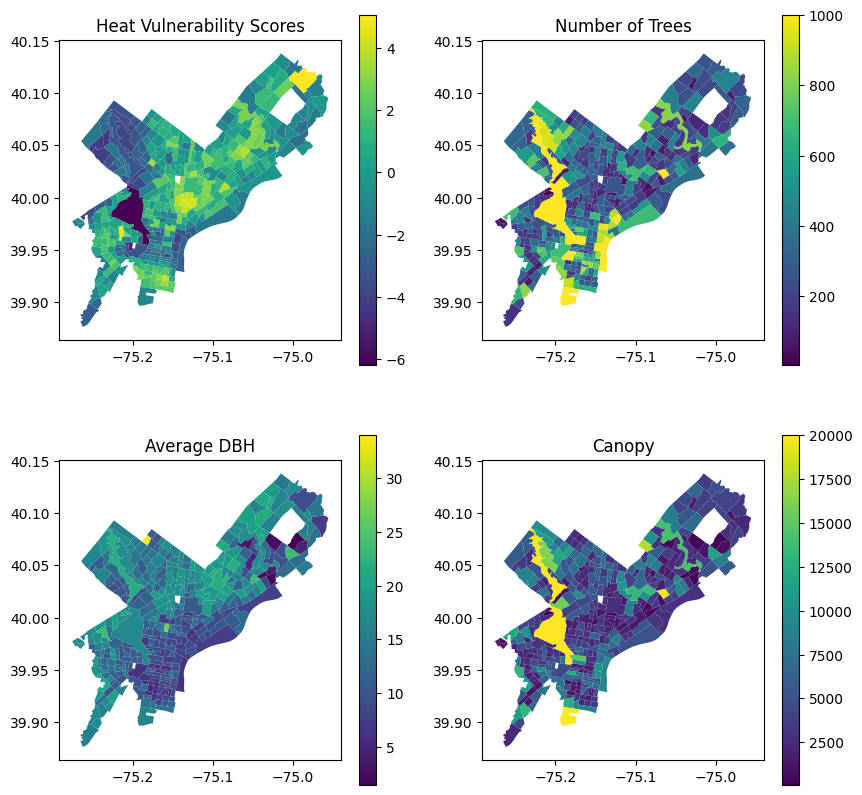

In [28]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10))
heat_shape.plot('HVI_SCORE', ax=ax[0,0], legend=True)
heat_shape.plot('num_trees', ax=ax[0,1], legend=True, vmax=1000)
heat_shape.plot('ave_dbh', ax=ax[1,0], legend=True)
heat_shape.plot('canopy', ax=ax[1,1], legend=True, vmax=20000)

# titles for each map
ax[0,0].set_title('Heat Vulnerability Scores')
ax[0,1].set_title('Number of Trees')
ax[1,0].set_title('Average DBH')
ax[1,1].set_title('Canopy')

<Axes: xlabel='ave_dbh', ylabel='HVI_SCORE'>

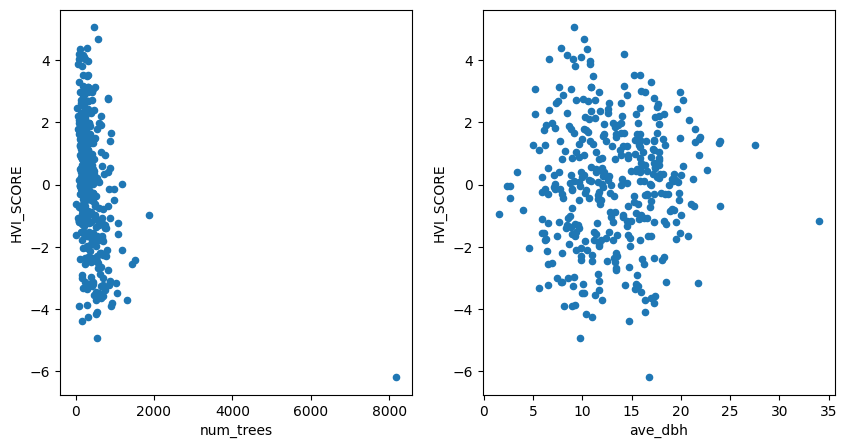

In [35]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
heat.plot('num_trees', 'HVI_SCORE', ax=ax[0], kind=('scatter'))
heat.plot('ave_dbh', 'HVI_SCORE', ax=ax[1], kind=('scatter'))